In [15]:
import sys, pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt
from matplotlib.pyplot import *
from scipy.interpolate import spline


In [211]:
cm_width = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/calculations/sigma_cm/cm_widths_data_and_calculation.csv',na_values=int,index_col=False)
cm_allpairs = cm_width[cm_width.pairing=='all pairs']
cm_nl00 = cm_width[cm_width.pairing=='nl=00']
cm_data = cm_width[cm_width.pairing=='nl=00']
Moniz_Calc = cm_width[cm_width['Moniz 3/4 kF']>0]
Colle_Calc_HO= cm_width[cm_width['Colle-HO']>0]
Colle_Calc_WS= cm_width[cm_width['Colle-WS']>0]
Ciofi_Calc = cm_width[cm_width['Coifi sigma [MeV]']>0]
Jlab_Data = cm_width[cm_width['JLab/E01-15']>0]
BNL_Data = cm_width[cm_width['BNL']>0]
Korover_Data = cm_width[cm_width['Korover et al. (JLAB)']>0]
ThisWork_Data = cm_width[cm_width['sigma(T) final']>0]
ThisWork_NoAcc = cm_width[cm_width['sigma(T) final err']>0]

In [282]:
from scipy.interpolate import interp1d, Akima1DInterpolator,BarycentricInterpolator,splprep

def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' , label=None, linewidth=4):
    f = interp1d(data[varx], data[vary],kind=kind)
    xnew = np.linspace(np.min(data[varx]), np.max(data[varx]), num=100, endpoint=True)
    plt.plot( xnew, f(xnew), '--', color=color , label=label, linewidth=linewidth )


def plot_errorbar_data( data , varx='A' , fmt='o', marker='^',color='red',
                       markersize=20, linewidth=4, 
                       Ashift=0, vary=None , varyerr=None , label=None ):
    ax.errorbar((data[varx]+Ashift).tolist(), data[vary].tolist(), yerr=data[varyerr].tolist(),                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)

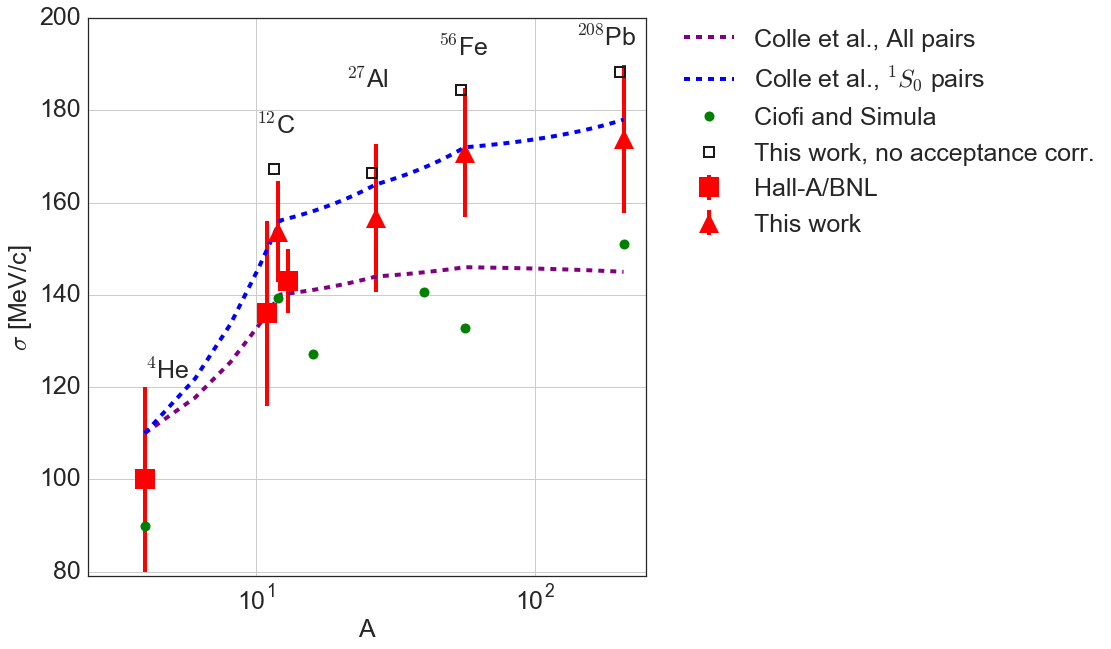

In [292]:
s=30
fig, ax = plt.subplots(figsize=(10,10))
plot_calculation_line( kind='slinear',data=Colle_Calc_HO[Colle_Calc_HO['pairing']=='all pairs'], varx='A',color='purple' , vary='Colle-HO',label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=Colle_Calc_HO[Colle_Calc_HO['pairing']=='nl=00'], varx='A' , vary='Colle-HO',label='Colle et al., $^1S_0$ pairs')
ax.plot((Ciofi_Calc['A']).tolist(), Ciofi_Calc['Coifi sigma [MeV]'].tolist(),color='green',marker='o',ms=10,linewidth=0,label='Ciofi and Simula')


plot_errorbar_data( data=BNL_Data, Ashift=1,marker='s', vary='BNL' , varyerr='BNL err' , label=None )
plot_errorbar_data( data=Jlab_Data, Ashift=-1, vary='JLab/E01-15' , varyerr='JLab/E01-15 err' , marker='s' , label='Hall-A/BNL' )
plot_errorbar_data( data=Korover_Data, vary='Korover et al. (JLAB)' , varyerr='Korover et al. (JLAB) - err' , marker='s' , label=None )

ax.plot((0.97*ThisWork_Data['A']).tolist(), ThisWork_Data['This work (no acc. corr.)'].tolist(), 
        color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')
plot_errorbar_data( data=ThisWork_Data, vary='sigma(T) final' , varyerr='sigma(T) final err' , label='This work' )

plt.grid()
pt.set_axes(ax , 'A' , '$\sigma$ [MeV/c]' , fontsize=25)
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)


ax.set_xlim(2.5,250)
ax.set_ylim(79,200)
ax.set_xscale('log')
ax.text(4,122,'$^4$He',fontsize=25)
ax.text(10,175,'$^{12}$C',fontsize=25)
ax.text(21,185,'$^{27}$Al',fontsize=25)
ax.text(45,192,'$^{56}$Fe',fontsize=25)
ax.text(140,194,'$^{208}$Pb',fontsize=25)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter7/figures/WidthAdependence.pdf', dpi=300, bbox_inches='tight')